In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from scipy.optimize import curve_fit
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget


plt.rc('lines', linewidth=3.0, markersize=10.0)
plt.rc('text', usetex=True)

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(10, 7))
plt.rc('figure', autolayout=True)

In [3]:
def get_espectro_abs(data_file, norm):
    arq = open(data_file)

    omega, eps1, eps2, JDOS = [], [], [], []

    for line in arq:
        linha = line.split()
        if len(linha) == 4:
            if linha[0] != '#':
                omega.append(float(linha[0]))
                eps2.append(float(linha[1]))
                eps1.append(float(linha[2]))
                JDOS.append(float(linha[3]))
            
    if norm is True:
        maxEps2 = max(eps2)
    else:
        maxEps2 = 1

    omega, eps1, eps2, JDOS = np.array(omega), np.array(eps1), np.array(eps2)/maxEps2, np.array(JDOS)
    
    return([omega, eps2, eps1, JDOS])

In [6]:
arq_eh_z = '../DATA/cubic/gw_bse/9-absorption_z/absorption_eh.dat'
arq_noeh_z = '../DATA/cubic/gw_bse/9-absorption_z/absorption_noeh.dat'

data_eh_z = get_espectro_abs(arq_eh_z, True)
data_noeh_z = get_espectro_abs(arq_noeh_z, True)

arq_eh_x = '../DATA/cubic/gw_bse/9-absorption_x/absorption_eh.dat'
arq_noeh_x = '../DATA/cubic/gw_bse/9-absorption_x/absorption_noeh.dat'

data_eh_x = get_espectro_abs(arq_eh_x, True)
data_noeh_x = get_espectro_abs(arq_noeh_x, True)

arq_eh_y = '../DATA/cubic/gw_bse/9-absorption_y/absorption_eh.dat'
arq_noeh_y = '../DATA/cubic/gw_bse/9-absorption_y/absorption_noeh.dat'

data_eh_y = get_espectro_abs(arq_eh_y, True)
data_noeh_y = get_espectro_abs(arq_noeh_y, True)

(0.0, 6.0)

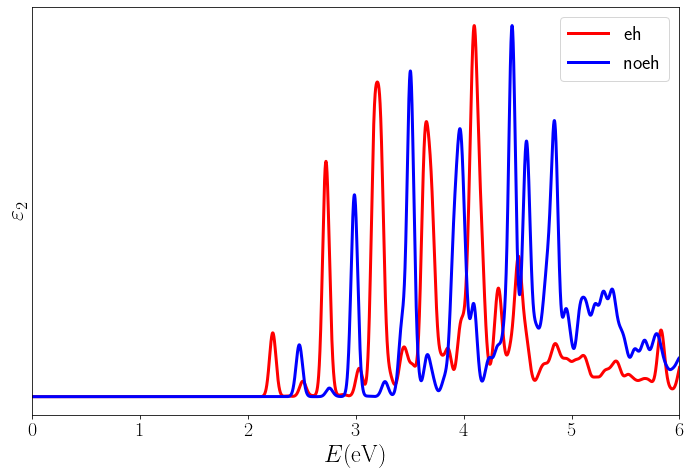

In [7]:
plt.figure()

plt.plot(data_eh_z[0], data_eh_z[1], 'r-', label='eh')
plt.plot(data_noeh_z[0], data_noeh_z[1], 'b-', label='noeh')

plt.legend()
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2$')
plt.yticks([])

plt.xlim([0, 6])

(0.0, 6.0)

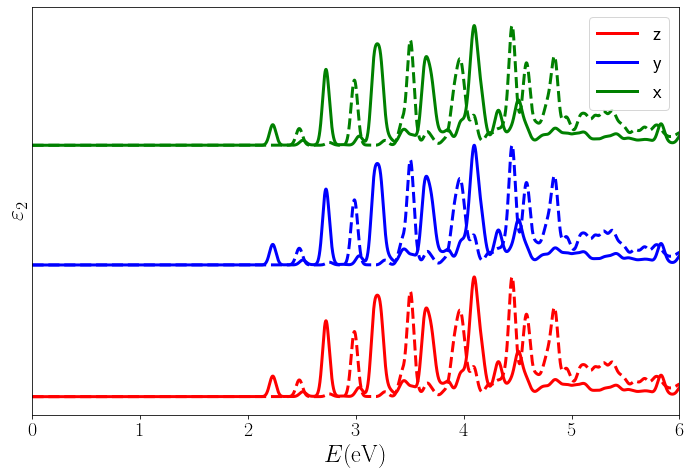

In [8]:
plt.figure()

plt.plot(data_eh_z[0], data_eh_z[1], 'r-', label='z')
plt.plot(data_noeh_z[0], data_noeh_z[1], 'r--')

plt.plot(data_eh_y[0], data_eh_y[1]+1.1, 'b-', label='y')
plt.plot(data_noeh_z[0], data_noeh_z[1]+1.1, 'b--')

plt.plot(data_eh_x[0], data_eh_x[1]+2.1, 'g-', label='x')
plt.plot(data_noeh_z[0], data_noeh_z[1]+2.1, 'g--')


plt.legend()
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2$')
plt.yticks([])

plt.xlim([0, 6])